## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

三種套件都有不同的特色，而在資料科學領域中傾向將圖片讀取為numpy陣列，方便運算，而matplotlib套件也支援numpy陣列的圖片顯示。

三種套件預設皆是讀取為8位元深度，三通道數的圖片(openCV為BGR格式，其餘為RGB格式)。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 3.4.1
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## 以skimage開啟圖片

圖片開啟後即為numpy陣列型態。

<class 'numpy.ndarray'>


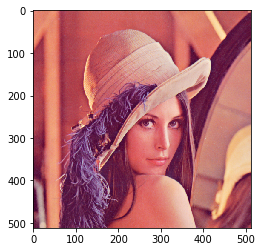

In [3]:
import skimage.io as skio
img_skimage = skio.imread('data/Lenna.png')
print(type(img_skimage))
plt.imshow(img_skimage)
plt.show()

## 以PIL開啟圖片

圖片開啟後須轉型為numpy陣列型態。

<class 'PIL.PngImagePlugin.PngImageFile'>


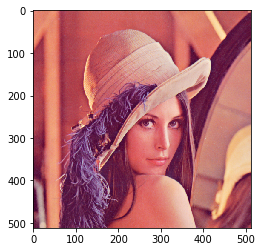

In [4]:
from PIL import Image
img_PIL = Image.open('data/Lenna.png') # 這時候還是 PIL object
print(type(img_PIL))
img_PIL = np.array(img_PIL)
plt.imshow(img_PIL)
plt.show()

## 以OpenCV開啟圖片

圖片開啟後即為numpy陣列型態，但是是以BGR格式呈現，須轉為RGB。

<class 'numpy.ndarray'>


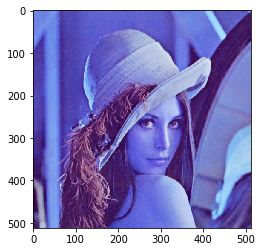

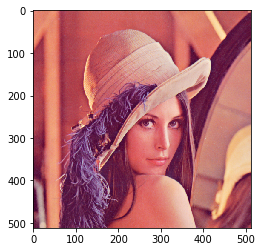

In [5]:
import cv2
img_openCV = cv2.imread('data/Lenna.png')
print(type(img_openCV))
plt.imshow(img_openCV)
plt.show()

img_openCV = cv2.cvtColor(img_openCV, cv2.COLOR_BGR2RGB)
plt.imshow(img_openCV)
plt.show()

## 比較三種讀取圖片方式的時間 - 比較讀取 100 次

In [6]:
%%timeit
im_skimage = np.array([skio.imread('data/Lenna.png') for _ in range(100)])

1.17 s ± 32.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
im_PIL = np.array([np.array(Image.open('data/Lenna.png')) for _ in range(100)])

1.11 s ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
im_openCV = np.array([cv2.cvtColor(cv2.imread('data/Lenna.png'), cv2.COLOR_BGR2RGB) for _ in range(100)])

931 ms ± 16.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## OpenCV開啟圖片轉灰階

不同的轉灰階方法可能因為轉換公式不同，導致轉換結果可能有差異，請盡量用同一種讀取灰階的方法讀取多張圖片，避免計算誤差。

In [9]:
img = cv2.cvtColor(cv2.imread('data/Lenna.png'), cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('data/Lenna.png', cv2.IMREAD_GRAYSCALE)

原圖


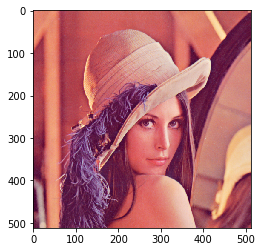

若使用預設值，無法正確顯示灰階圖


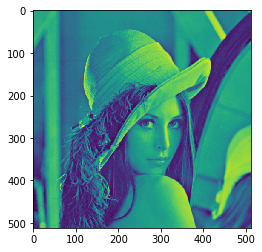

新增參數cmap='gray'


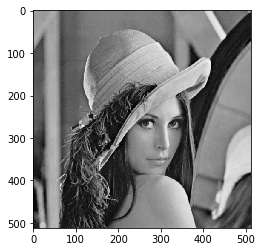

也可以透過cv2.cvtColor將原圖轉為灰階


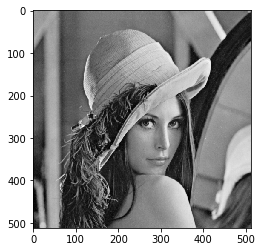

In [10]:
print('原圖')
plt.imshow(img)
plt.show()
print('若使用預設值，無法正確顯示灰階圖')
plt.imshow(img_gray)
plt.show()
print("新增參數cmap='gray'")
plt.imshow(img_gray, cmap='gray')
plt.show()
print('也可以透過cv2.cvtColor將原圖轉為灰階')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cmap='gray')
plt.show()

## OpenCV自訂灰階算法

由於讀取出來的圖片是以numpy陣列儲存，直接針對此陣列做運算，可以自訂轉換灰階的算法，達到自己想要的效果。

In [11]:
# 將RGB陣列乘以指定權重
def rgb2gray_weight(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [12]:
# 平均值法
def rgb2gray_avg(rgb):
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            img_gray[i, j] = (int(rgb[i,j][0]) + int(rgb[i,j][1]) + int(rgb[i,j][2]))/3
    return img_gray

In [13]:
# 最大值法
def rgb2gray_max(rgb):
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            img_gray[i, j] = max(rgb[i,j][0], rgb[i,j][1], rgb[i,j][2])
    return img_gray

In [14]:
# 最小值法
def rgb2gray_min(rgb):
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            img_gray[i, j] = min(rgb[i,j][0], rgb[i,j][1], rgb[i,j][2])
    return img_gray

原圖


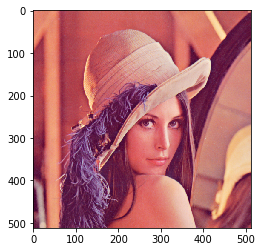

自訂灰階RGB權重


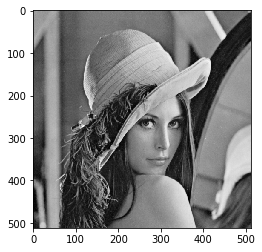

灰階平均值法


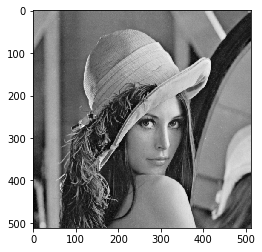

灰階最大值法


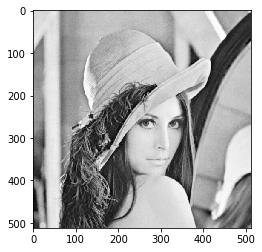

灰階最小值法


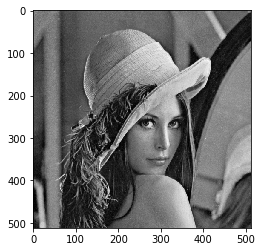

In [15]:
print('原圖')
plt.imshow(img)
plt.show()
print('自訂灰階RGB權重')
plt.imshow(rgb2gray_weight(img), cmap='gray')
plt.show()
print('灰階平均值法')
plt.imshow(rgb2gray_avg(img), cmap='gray')
plt.show()
print('灰階最大值法')
plt.imshow(rgb2gray_max(img), cmap='gray')
plt.show()
print('灰階最小值法')
plt.imshow(rgb2gray_min(img), cmap='gray')
plt.show()

## 彩色圖與灰階圖維度差異

利用numpy.shape可以查看圖片的維度，可以看出彩色圖與灰階圖維度的差異

In [16]:
print('彩色圖維度:', img.shape)
print('灰階圖維度:', img_gray.shape)

彩色圖維度: (512, 512, 3)
灰階圖維度: (512, 512)


## OpenCV將圖片轉存

圖片可以轉存為多種圖片格式，例如JPG、PNG、BMP...等等。

使用openCV中的`imwrite`即可將圖片存檔，並回傳儲存的結果(T/F)。

以JPG、PNG及BMP三種檔案格式來說，JPG為失真壓縮，會導致儲存後再讀取與原圖不符，PNG及BMP不會有此問題。

In [17]:
# 實驗1 將png圖片讀取後直接存為png，再讀取剛儲存的圖片，比較儲存後再讀取是否影響圖片
img_ori = cv2.imread('data/Lenna.png')
cv2.imwrite('data/Lenna_png.png', img_ori)
img_png = cv2.imread('data/Lenna_png.png')
print('兩圖片是否完全相等:', (img_ori == img_png).all())

兩圖片是否完全相等: True


In [18]:
# 實驗2 將png圖片讀取後直接存為jpg，再讀取剛儲存的圖片，比較儲存後再讀取是否影響圖片
img_ori = cv2.imread('data/Lenna.png')
cv2.imwrite('data/Lenna_jpg.jpg', img_ori)
img_jpg = cv2.imread('data/Lenna_jpg.jpg')
print('兩圖片是否完全相等:', (img_ori == img_jpg).all())

兩圖片是否完全相等: False


In [19]:
# 實驗3 將png圖片讀取後直接存為bmp，再讀取剛儲存的圖片，比較儲存後再讀取是否影響圖片
img_ori = cv2.imread('data/Lenna.png')
cv2.imwrite('data/Lenna_bmp.bmp', img_ori)
img_bmp = cv2.imread('data/Lenna_bmp.bmp')
print('兩圖片是否完全相等:', (img_ori == img_bmp).all())

兩圖片是否完全相等: True


## `imwrite`其他參數

對於儲存jpg格式來說，可以給定第三個品質的參數，數值由0~100，預設為95，越高代表品質越高，但是就算設為最高也是會失真。

對於儲存png格式來說，可以給定第三個壓縮級別的參數，數值由0~9，預設為3，越高代表儲存後的檔案大小越小，但是儲存時所花費的時間就越多。

In [20]:
# 實驗4 將png圖片讀取後直接存為高品質jpg，再讀取剛儲存的圖片，比較儲存後再讀取是否影響圖片
img_ori = cv2.imread('data/Lenna.png')
cv2.imwrite('data/Lenna_jpg.jpg', img_ori, [cv2.IMWRITE_JPEG_QUALITY, 100])
img_jpg = cv2.imread('data/Lenna_jpg.jpg')
print('兩圖片是否完全相等:', (img_ori==img_jpg).all())

兩圖片是否完全相等: False


## 比較png儲存壓縮級別對存檔時間的影響 - 比較儲存 100 次

In [21]:
%%timeit
for _ in range(100):
    cv2.imwrite('data/Lenna_png_9.png', img_ori, [cv2.IMWRITE_PNG_COMPRESSION, 9])

6.12 s ± 112 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%timeit
for _ in range(100):
    cv2.imwrite('data/Lenna_png_0.png', img_ori, [cv2.IMWRITE_PNG_COMPRESSION, 0])

2.16 s ± 74.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
